## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.7.30
- 성명 : 신인철
- 점수 :

Q1. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(0,20,0.1) 

200


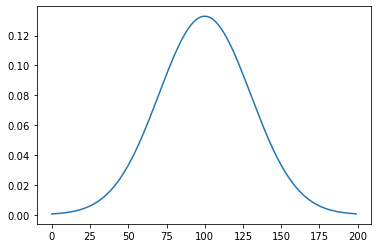

In [33]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,20,0.1)
print(len(x))
plt.plot(stats.norm.pdf(loc=10,scale=3,x=x))

Q2. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,8,0.1)

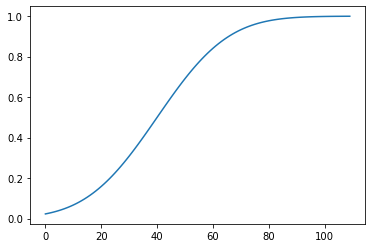

In [5]:
x = np.arange(-3,8,0.1)
plt.plot(stats.norm.cdf(loc=1,scale=2,x=x))


Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df2의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [35]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('dataset/5_2_fm.csv')
df2 = df1.copy()
df2.replace({'A':'C','B':'D'},inplace=True)
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [36]:
df2.loc[df2['species'] == 'C','length'] = df2.length * 2
df2.loc[df2['species'] == 'D','length'] = df2.length * 3
df2

,species,length
0,C,4
1,C,6
2,C,8
3,D,18
4,D,24
5,D,30


In [37]:
df = pd.concat([df1,df2])
print(df.groupby(['species']).mean())
print(df.groupby(['species']).std())

         length
species        
A           3.0
B           8.0
C           6.0
D          24.0
         length
species        
A           1.0
B           2.0
C           2.0
D           6.0


Q4. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요. 
- 피벗테이블을 이용, 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [32]:
df = pd.read_csv('dataset/5_2_shoes.csv')
df2 = df.copy()
wow = pd.concat([df,df2])
print(wow)
wow.pivot_table(index=['store'],columns=['color'],values=['sales'],aggfunc='sum')

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


sales    
color  blue red
store          
osaka    26  18
tokyo    20  30

Q5. 주어진 fish 데이터로 다음사항을 수행하세요.
- 모평균의 점추정, 모분산의 점추정
- 자유도(표준오차 - 1), 표준오차
- 신뢰구간 계산 

In [ ]:
df = pd.read_csv('dataset/5_7_fl.csv')
fish = df['length']

Q6. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

<AxesSubplot:xlabel='None-sex', ylabel='pclass'>

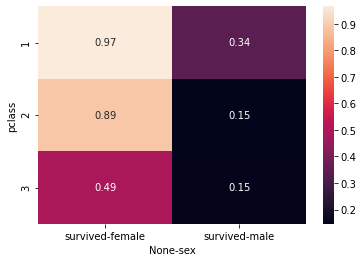

In [46]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('dataset/titanic3.csv')
dp = df.pivot_table(index=['pclass'],columns=['sex'],values=['survived'],aggfunc='mean')
sns.heatmap(dp,annot=True)

Q7. 4행 5열 배열과 5행 3열 배열을 생성하여 a, b 이름으로 저장 후 a, b의 행렬 곱을 구하세요. (출력 결과는 4행 3열 배열)

In [48]:
a = np.arange(20).reshape(4,5)
b = np.arange(15).reshape(5,3)

np.dot(a,b)

array([[ 90, 100, 110],
       [240, 275, 310],
       [390, 450, 510],
       [540, 625, 710]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [95]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)


   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


5    10
Name: length, dtype: int64
10    2
Name: length, dtype: int64


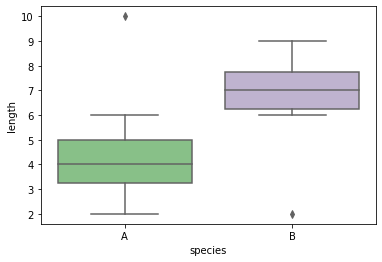

In [96]:
sns.boxplot(x='species',y='length',data=fish_multi,palette='Accent')
def wow(a):    
    q1,q3 = np.percentile(a,[25,75])
    iqr = q3 - q1

    return a[((a <= (q1 - 1.5 * iqr))|(a >= (q3 + 1.5 * iqr)))]

a = wow(fish_multi.groupby(['species']).get_group('A')['length'])
b = wow(fish_multi.groupby(['species']).get_group('B')['length'])
print(a)
print(b)

<AxesSubplot:xlabel='species', ylabel='length'>

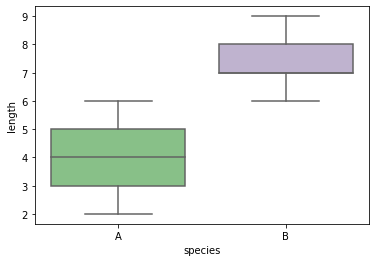

In [98]:
fish_multi[5:6] = np.nan
fish_multi[10:11] = np.nan
fish_multi.dropna(inplace=True)
fish_multi.length = fish_multi.length.astype(int)
sns.boxplot(x='species',y='length',data=fish_multi,palette='Accent')

<AxesSubplot:xlabel='species', ylabel='length'>

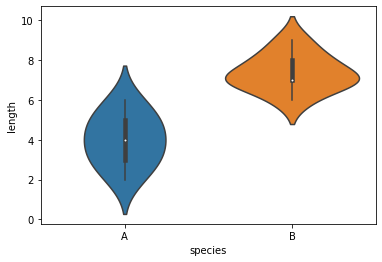

In [100]:
sns.violinplot(x='species',y='length',data=fish_multi)

Q9. df_auto mpg 컬럼과 weight 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
그래프로 같이 표현하여 탐색 후 인사이트를 기술하세요.

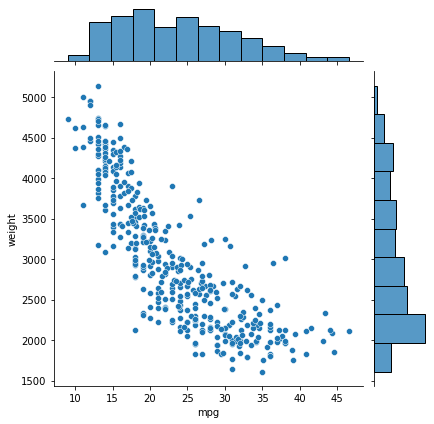

In [105]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
sns.jointplot(x=df_auto.mpg,y=df_auto.weight,data=df_auto)
# 음의 상관관계를 가지고 있다
# 무게가 높으면 연비가 낮아진다
# 5000의 무게의 차 보다 그 전의 단계 수준인 4500의 부근에 차들이 많이 분포해 있다


Q10. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다는 것을 그래프로 증명하세요. 단, 모분산은 아래 모집단으로 부터 도출된다.

In [106]:
population = stats.norm(loc = 4, scale = 0.8)

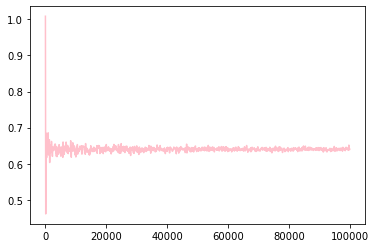

In [111]:
size = np.arange(10,100100,100)
boolpyun_var_array_size = np.zeros(len(size))
np.random.seed(1)

for i in range(0,len(size)):
    sample = population.rvs(size=size[i])
    boolpyun_var_array_size[i] = np.var(sample,ddof=1)

plt.plot(size,boolpyun_var_array_size,color='pink')